In [2]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean, median
plt.rcParams['figure.figsize'] = (15, 10)
import matplotlib.patches as mpatches
import numpy as np
import numpy.fft
import scipy.optimize

In [3]:
ft = genfromtxt('ft_xy_thesis.csv', delimiter=';')
data = ft[:,:]

[ 14.39193906   0.999535     2.33353103 -17.14626847]


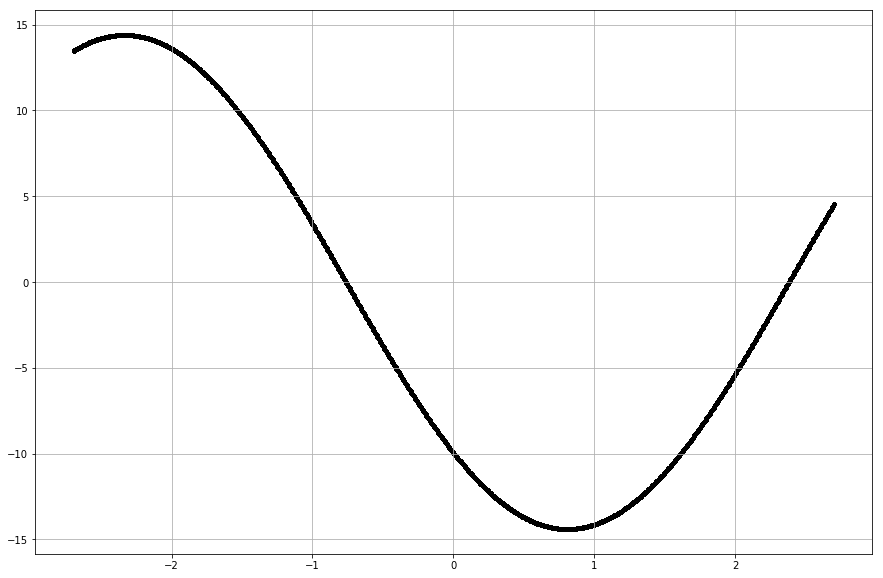

In [4]:
data = ft[:,1]
tt = ft[:,0]
def sinfunc(t, A,w, p, c=0):  
        return A * np.cos(w*t + p) + c
guess_amp = np.std(data) * 2.**0.5
guess_offset = np.mean(data)
guess = np.array([guess_amp, 1, 1, guess_offset])
bnds = ([0,0,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf])
popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, data, p0=guess,bounds=bnds)
print(popt)
A, w, p, c = popt
fitfunc = lambda t: A * np.cos(w*t +p)
plt.scatter(tt,fitfunc(tt),color="black",marker=".")
plt.grid()

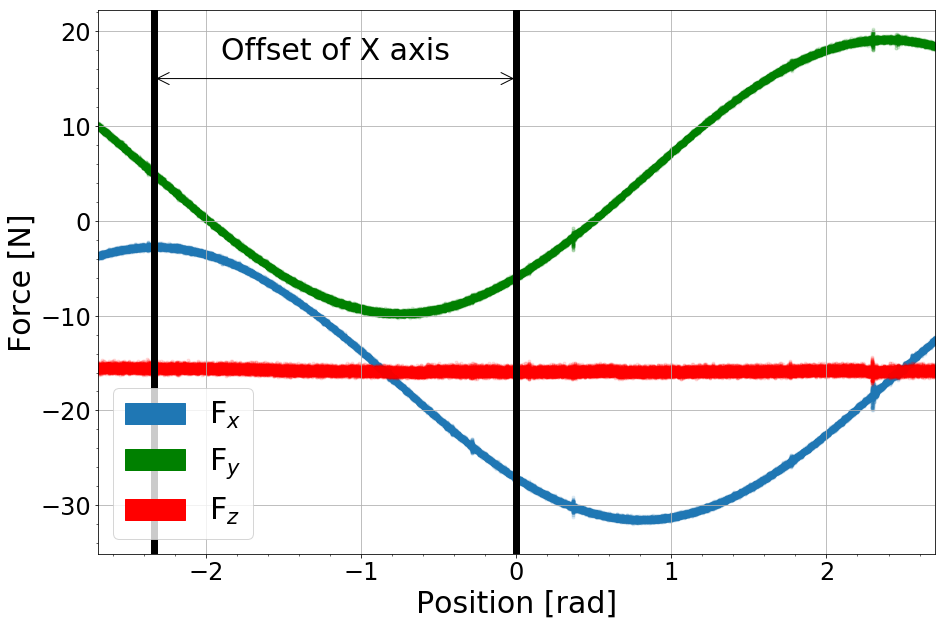

In [5]:
data = ft[:,:]
#Plot for readings of forces
blue_patch = mpatches.Patch(color='#1f77b4', label='F$_x$')
green_patch = mpatches.Patch(color='green', label='F$_y$')
red_patch = mpatches.Patch(color='red', label='F$_z$')

fig, ax1 = plt.subplots()
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax1.set_xlabel('Position [rad]', size=30)
ax1.set_ylabel('Force [N]', size=30)

t = ft[:,0]
plt.scatter(t,data[:,1],color='#1f77b4',alpha=0.1,marker=".")
plt.scatter(t,data[:,2],color="green",alpha=0.1,marker=".")
plt.scatter(t,data[:,3],color="red",alpha=0.1,marker=".")
plt.plot()

ax1.set_xlim([min(t[:]),max(t)])
ax1.set_ylim([np.min(data)*1.1,np.max(data)*1.1])
ax1.legend(handles=[blue_patch,green_patch,red_patch], prop={'size': 30})

plt.axvline(x=0,color="black",linewidth=7)
plt.axvline(x=-p,color="black",linewidth=7)
plt.annotate(s='', size=30,xy=(-p,15), xytext=(0,15), arrowprops={"arrowstyle":'<->'})
plt.text(-1.9,17,"Offset of X axis",size=30)

plt.minorticks_on()
plt.grid()
plt.savefig('/home/robotronics/Pictures/xy_calib.png', format='png', dpi=100)

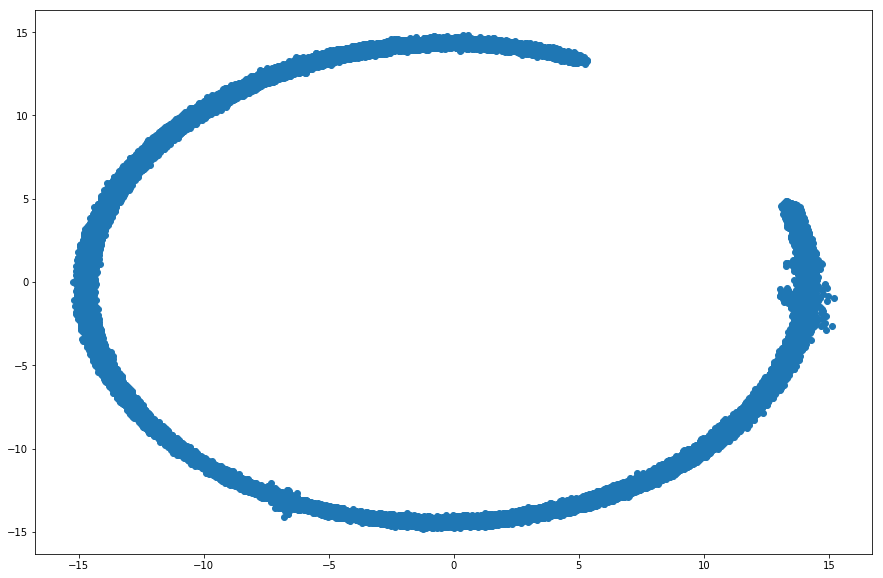

In [6]:
o0 = (np.max(data[:,2])+np.min(data[:,2]))/2
o1 = (np.max(data[:,1])+np.min(data[:,1]))/2

plt.scatter(data[:,2]-o0,data[:,1]-o1)